In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)

In [ ]:
PPP <- read_csv('./PPP_with_FIPS.csv')

In [6]:
system('R CMD SHLIB ./C_files/kde.c')

dyn.load('./C_files/kde.so')

kde <- function(x,m){

    x <- as.double(x)

    m <- as.integer(m)

    g <- as.double(seq(min(x),max(x),length.out = m))

    n <- as.integer(length(x))

    bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))

    y <- double(m)

    a <- .C('KDE',n=n,m=m,x=x,g=g,y=y,bw=bw)

    return(a$y)

}

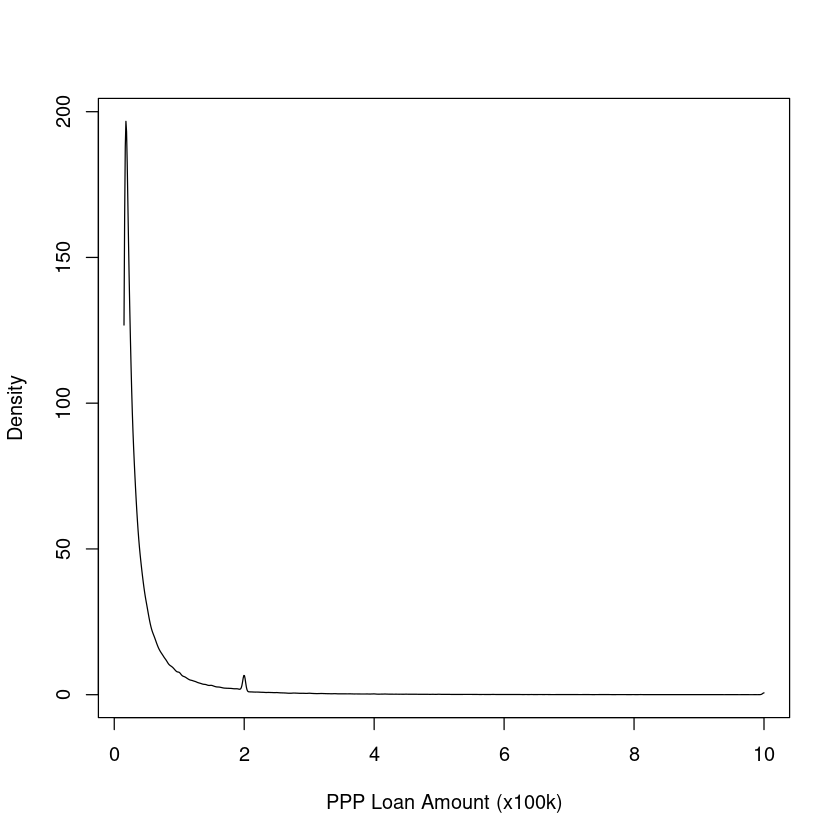

In [9]:
x <- PPP$CurrentApprovalAmount / 1e6
m <- 1000

est <- kde(x, m)

plot(seq(min(x),max(x),length.out = m), est,
    type = 'l',
    xlab = 'PPP Loan Amount (x100k)',
    ylab = 'Density')

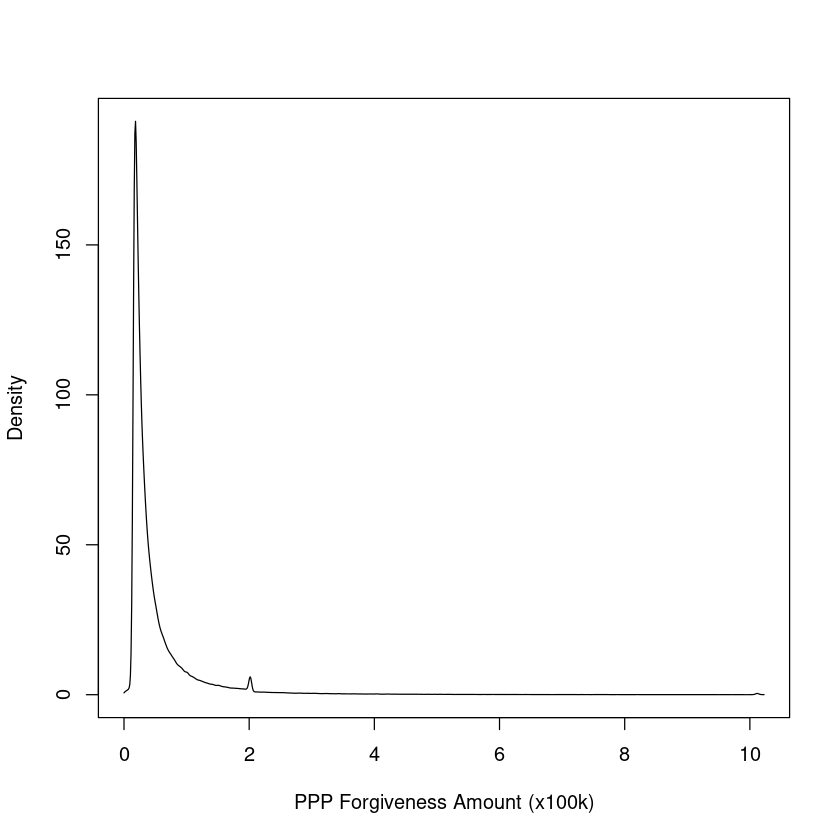

In [19]:
x <- PPP[!is.na(PPP$ForgivenessAmount),'ForgivenessAmount'] %>% pull() / 1e6

m <- 1000

est <- kde(x, m)

plot(seq(min(x),max(x),length.out = m), est,
    type = 'l',
    xlab = 'PPP Forgiveness Amount (x100k)',
    ylab = 'Density')

In [20]:
system("R CMD SHLIB ./C_files/tetrachoric.c")

dyn.load("./C_files/tetrachoric.so")

t_corr <- function(x,y){

    x <- as.integer(x)
    y <- as.integer(y)

    n <- as.integer(length(x))

    res <- integer(1)

    a <- .C("tetrachoric", n=n,x=x,y=y,res=res)

    return(a$res)

}

In [52]:
PPP$RuralUrbanIndicator

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 [1441] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [30]:
PPP$RuralUrbanIndicator <- ifelse(PPP$RuralUrbanIndicator == 'R', 1, 0) 

LoanNumber,DateApproved,SBAOfficeCode,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,⋯,JobsReported,NAICSCode,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,ForgivenessAmount,ForgivenessDate,BorrowerFIPS
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1517597200,04/15/2020,459,ACTION ENTERPRISE HOLDINGS LLC,204 20TH ST N,BIRMINGHAM,AL,35203,08/05/2021,Paid in Full,⋯,499,484220,Limited Liability Company(LLC),2408,Regions Bank,BIRMINGHAM,AL,10124658,07/27/2021,01073
4982277110,04/13/2020,459,"MAYNARD COOPER & GALE, PC.",1901 6TH AVE N Ste 2400,BIRMINGHAM,AL,35203,09/24/2021,Paid in Full,⋯,465,541110,Corporation,2408,Regions Bank,BIRMINGHAM,AL,10132329,08/18/2021,01073
3354487304,04/29/2020,459,SECURITY ENGINEERS INC,1617 3rd Ave N,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,500,561612,Corporation,102000,First Source FCU,NEW HARTFORD,NY,6943291,06/11/2021,01073
5161177003,04/05/2020,459,BALCH & BINGHAM LLP,1901 6TH AVE N Ste 1500,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,381,541110,Partnership,102000,First Source FCU,NEW HARTFORD,NY,6939332,06/09/2021,01073
1420668709,03/27/2021,459,BIRMINGHAM JEFFERSON CIVIC CENTER AUTHORITY,2100 Richard Arrington Jr Blvd N,Birmingham,AL,35203,06/07/2022,Paid in Full,⋯,238,711310,Corporation,2408,Regions Bank,BIRMINGHAM,AL,4775943,03/24/2022,01073
3973897210,04/27/2020,459,"DIOCESE OF BIRMINGHAM IN ALABAMA, A CORPORATION SOLE",2121 3rd Avenue North,Birmingham,AL,35203,06/05/2020,Paid in Full,⋯,496,813110,Non-Profit Organization,455251,Oakworth Capital Bank,BIRMINGHAM,AL,3158599,06/15/2021,01073


In [61]:
county_data <- PPP %>%
group_by(BorrowerFIPS) %>%
summarise_at(.,.vars = vars(CurrentApprovalAmount, ForgivenessAmount), 
.funs = list(sum = sum, mean = mean), na.rm = T)

rural_pcts <- PPP %>%
group_by(BorrowerFIPS) %>%
summarize(rural_pct = sum(RuralUrbanIndicator)/length(RuralUrbanIndicator))

county_data <- county_data %>%
merge(rural_pcts, by = 'BorrowerFIPS')

county_data %>% write.csv("./county_level_data.csv")

In [80]:
system('R CMD SHLIB ./C_files/kre.c')

dyn.load('./C_files/kre.so')

krg <- function(x,y,m, g = NULL, bw = NULL){

    x <- as.double(x)
    y <- as.double(y)

    n <- as.integer(length(x))
    m <- as.integer(m)

    
    if(is.null(g)){ 
        g <- as.double(seq(min(x),max(x),length.out = m))
    }

    if(is.null(bw)){
        bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))
    }

    est <- double(m)

    a <- .C('NW_estimate', x=x,y=y,n=n,b=bw,g=g,m=m,est=est)

    return(a)

}

kern_reg <- function(x,y,m,ci = F){

    r <- krg(x,y,m)

    bw <- r$b
    g <- r$g
    estimate <- r$est

    if(ci == T){

        n <- length(x)

        res_mat <- matrix(nrow = m, ncol = 200)

        rownames(res_mat) <- paste0("m",1:m)

        for (i in 1:200){        

            indices <- sample(1:n, 2000, replace = T)

            x_samp <- x[indices]
            y_samp <- y[indices]

            res_mat[,i] <- krg(x,y,m,g = g, bw = bw)
        }

        conf_ints <- res_mat %>%
        apply(1,quantile, probs = c(.025, .975))

        return(list(est = estimate, conf_ints = conf_ints))
    }

    return(estimate)

}

In [81]:
x <- county_data$rural_pct

y <- county_data$ForgivenessAmount_mean

z <- kern_reg(x,y,1000,ci=T)

ERROR: Error in res_mat[, i] <- krg(x, y, m, g = g, bw = bw): number of items to replace is not a multiple of replacement length


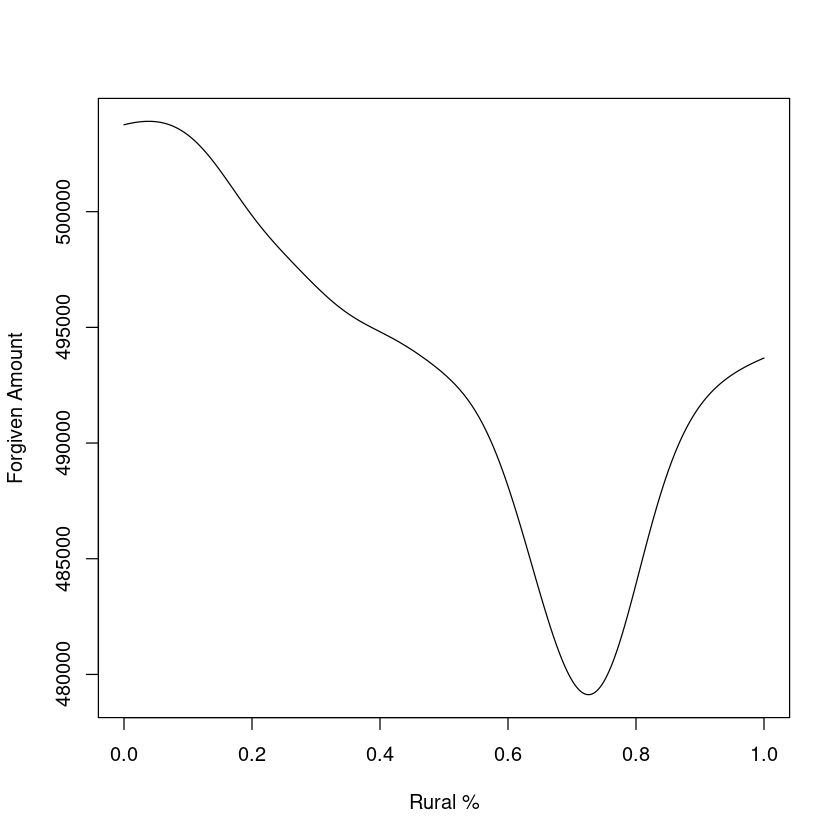

In [76]:
plot(seq(min(x),max(x),length.out = 1000),
z$est,
type = 'l',
xlab = 'Rural %',
ylab = 'Forgiven Amount')